In [1]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 인터넷 화면 출력
from IPython.display import IFrame

In [2]:
df_2022 = pd.read_csv('../data/df_2022_lh거주인구공유차량_merge.csv')

In [3]:
df_2022.columns

Index(['단지코드', '단지명', '지원유형', '세대수', '주차면수', '경도', '위도', 'geometry', '단지평수',
       '월세', '이용건수_2201', '이용시간_2201', '이용건수_2202', '이용시간_2202', '이용건수_2203',
       '이용시간_2203', '이용건수_2204', '이용시간_2204', '이용건수_2205', '이용시간_2205',
       '이용건수_2206', '이용시간_2206', '이용건수_2207', '이용시간_2207', '이용건수_2208',
       '이용시간_2208', '이용건수_2209', '이용시간_2209', '이용건수_2210', '이용시간_2210',
       '이용건수_2211', '이용시간_2211', '이용건수_2212', '이용시간_2212', '전체이용건수', '전체이용시간',
       '차량유형', '설치대수', 'gid', 'm_20g_pop', 'w_20g_pop', 'm_30g_pop',
       'w_30g_pop', 'm_40g_pop', 'w_40g_pop', 'm_50g_pop', 'w_50g_pop',
       'm_60g_pop', 'w_60g_pop', 'm_70g_pop', 'w_70g_pop', 'm_80g_pop',
       'w_80g_pop', 'm_90g_pop', 'w_90g_pop', 'm_100g_pop', 'w_100g_pop',
       'total_pop', 'youth_pop', '가장가까운지하철역까지거리', '가장가까운지하철역', '전체이용건수_2022',
       '전체이용시간_2022', 'year'],
      dtype='object')

## 2022년도

In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   단지코드           123 non-null    object 
 1   단지명            123 non-null    object 
 2   지원유형           123 non-null    object 
 3   세대수            123 non-null    int64  
 4   주차면수           123 non-null    float64
 5   경도             123 non-null    float64
 6   위도             123 non-null    float64
 7   geometry       123 non-null    object 
 8   단지평수           123 non-null    object 
 9   월세             123 non-null    int64  
 10  이용건수_2201      58 non-null     float64
 11  이용시간_2201      58 non-null     float64
 12  이용건수_2202      58 non-null     float64
 13  이용시간_2202      58 non-null     float64
 14  이용건수_2203      58 non-null     float64
 15  이용시간_2203      58 non-null     float64
 16  이용건수_2204      58 non-null     float64
 17  이용시간_2204      58 non-null     float64
 18  이용건수_2205 

### 결측치

In [5]:
# 이용시간, 이용건수 전처리
# 설치소가 없다는 의미이므로 이용건수, 이용시간 0으로 대체
# 차량유형, 설치대수는 23년 12월 기준이므로 '없음'으로 대체

df_2022.fillna({col: 0 for col in df_2022.columns if '이용건수' in col or '이용시간' in col}, inplace=True)
df_2022['차량유형'] = df_2022['차량유형'].fillna('없음')
df_2022['설치대수'] = df_2022['설치대수'].fillna(0)
df_2022.isna().sum()

단지코드             0
단지명              0
지원유형             0
세대수              0
주차면수             0
                ..
가장가까운지하철역까지거리    0
가장가까운지하철역        0
전체이용건수_2022      0
전체이용시간_2022      0
year             0
Length: 64, dtype: int64

## EDA(시각화)

In [6]:
df_2022.columns

Index(['단지코드', '단지명', '지원유형', '세대수', '주차면수', '경도', '위도', 'geometry', '단지평수',
       '월세', '이용건수_2201', '이용시간_2201', '이용건수_2202', '이용시간_2202', '이용건수_2203',
       '이용시간_2203', '이용건수_2204', '이용시간_2204', '이용건수_2205', '이용시간_2205',
       '이용건수_2206', '이용시간_2206', '이용건수_2207', '이용시간_2207', '이용건수_2208',
       '이용시간_2208', '이용건수_2209', '이용시간_2209', '이용건수_2210', '이용시간_2210',
       '이용건수_2211', '이용시간_2211', '이용건수_2212', '이용시간_2212', '전체이용건수', '전체이용시간',
       '차량유형', '설치대수', 'gid', 'm_20g_pop', 'w_20g_pop', 'm_30g_pop',
       'w_30g_pop', 'm_40g_pop', 'w_40g_pop', 'm_50g_pop', 'w_50g_pop',
       'm_60g_pop', 'w_60g_pop', 'm_70g_pop', 'w_70g_pop', 'm_80g_pop',
       'w_80g_pop', 'm_90g_pop', 'w_90g_pop', 'm_100g_pop', 'w_100g_pop',
       'total_pop', 'youth_pop', '가장가까운지하철역까지거리', '가장가까운지하철역', '전체이용건수_2022',
       '전체이용시간_2022', 'year'],
      dtype='object')

### 지원유형별 공유차량 이용량

In [7]:
df_2022.지원유형.unique()

array(['국민임대', '공공임대', '영구임대', '행복주택'], dtype=object)

In [8]:
이용건수_2022 = ['이용건수_2201', '이용건수_2202',
                 '이용건수_2203', '이용건수_2204', '이용건수_2205', '이용건수_2206', '이용건수_2207',
                 '이용건수_2208', '이용건수_2209', '이용건수_2210', '이용건수_2211', '이용건수_2212']
이용시간_2022 = ['이용시간_2201', '이용시간_2202',
                 '이용시간_2203', '이용시간_2204', '이용시간_2205', '이용시간_2206', '이용시간_2207',
                 '이용시간_2208', '이용시간_2209', '이용시간_2210', '이용시간_2211', '이용시간_2212']

df_지원유형별_2022 = df_2022.groupby('지원유형')[이용건수_2022 + 이용시간_2022].mean().T # 평균 이용시간 계산
df_지원유형별_이용건수_2022 = df_지원유형별_2022.iloc[0:12,:]
df_지원유형별_이용시간_2022 = df_지원유형별_2022.iloc[12:,:]
df_지원유형별_2022

지원유형,공공임대,국민임대,영구임대,행복주택
이용건수_2201,15.526316,13.181818,7.666667,20.75
이용건수_2202,16.684211,10.381818,7.222222,17.65
이용건수_2203,14.368421,11.345455,7.111111,17.50
이용건수_2204,14.421053,11.618182,8.333333,17.15
이용건수_2205,14.578947,11.436364,8.444444,19.10
이용건수_2206,14.684211,11.000000,8.777778,17.10
이용건수_2207,16.947368,11.454545,7.333333,20.15
이용건수_2208,15.157895,10.600000,8.222222,19.30
이용건수_2209,14.894737,12.327273,10.666667,15.65
이용건수_2210,13.368421,11.290909,13.666667,19.25


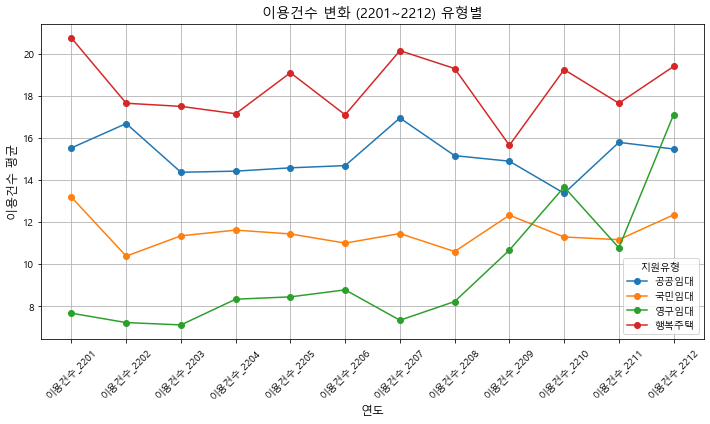

In [9]:
plt.figure(figsize=(10, 6))
for support_type in df_지원유형별_이용건수_2022.columns:
    plt.plot(df_지원유형별_이용건수_2022.index, df_지원유형별_이용건수_2022[support_type], label=support_type, marker='o')

plt.title('이용건수 변화 (2201~2212) 유형별', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('이용건수 평균', fontsize=12)
plt.legend(title='지원유형', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=> 유형별로 상이한 평균 이용건수를 보임 

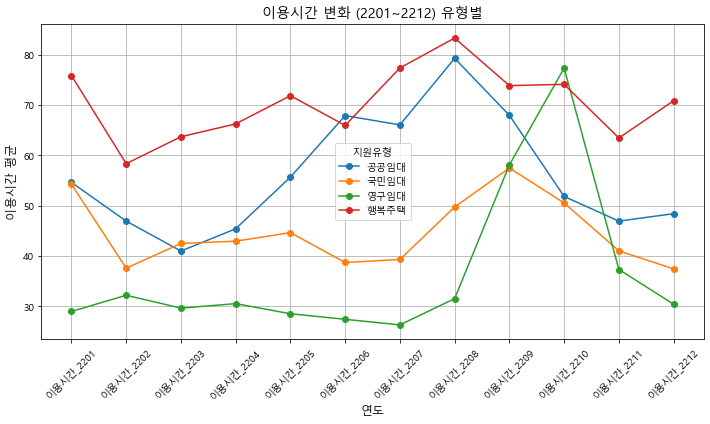

In [10]:
plt.figure(figsize=(10, 6))
for support_type in df_지원유형별_이용시간_2022.columns:
    plt.plot(df_지원유형별_이용시간_2022.index, df_지원유형별_이용시간_2022[support_type], label=support_type, marker='o')

plt.title('이용시간 변화 (2201~2212) 유형별', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('이용시간 평균', fontsize=12)
plt.legend(title='지원유형', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=> 대체로 이용건수의 추세를 따라감

#### 지원유형 통합 후 시각화

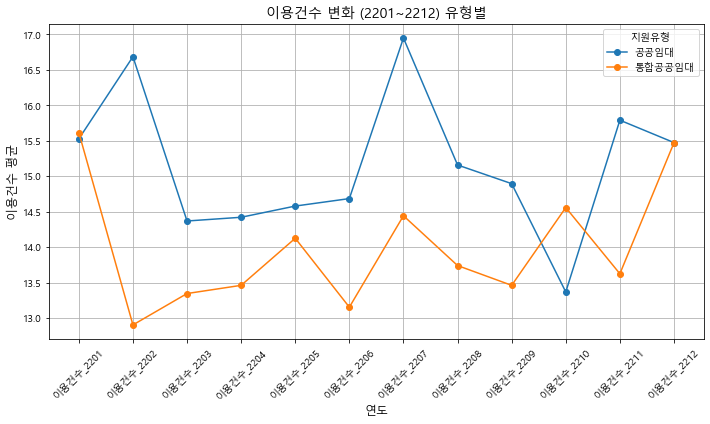

In [11]:
df_2022.loc[df_2022['지원유형'].isin(['영구임대', '국민임대', '행복주택']), '지원유형'] = '통합공공임대'

# 통합한 지원유형으로 group화
df_지원유형별_2022 = df_2022.groupby('지원유형')[이용건수_2022 + 이용시간_2022].mean().T # 평균 이용시간 계산
df_지원유형별_이용건수_2022 = df_지원유형별_2022.iloc[0:12,:]
df_지원유형별_이용시간_2022 = df_지원유형별_2022.iloc[12:,:]

# 시각화
plt.figure(figsize=(10, 6))
for support_type in df_지원유형별_이용건수_2022.columns:
    plt.plot(df_지원유형별_이용건수_2022.index, df_지원유형별_이용건수_2022[support_type], label=support_type, marker='o')

plt.title('이용건수 변화 (2201~2212) 유형별', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('이용건수 평균', fontsize=12)
plt.legend(title='지원유형', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

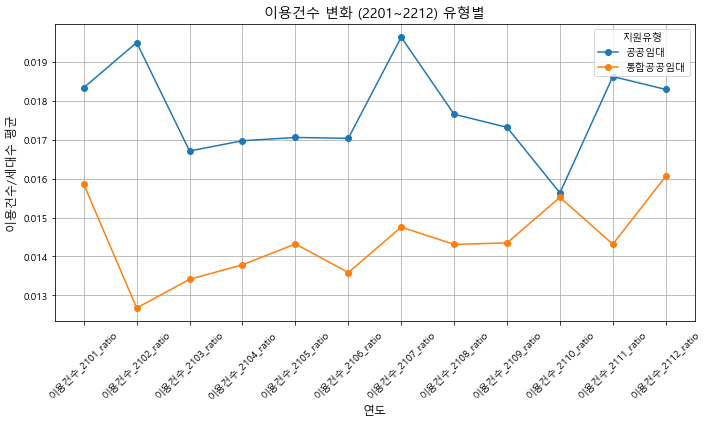

In [16]:
이용건수_2022_ratio = ['이용건수_2101_ratio', '이용건수_2102_ratio',
                 '이용건수_2103_ratio', '이용건수_2104_ratio', '이용건수_2105_ratio', '이용건수_2106_ratio', '이용건수_2107_ratio',
                 '이용건수_2108_ratio', '이용건수_2109_ratio', '이용건수_2110_ratio', '이용건수_2111_ratio', '이용건수_2112_ratio']

# '이용건수_ratio' 계산
for i, col in enumerate(이용건수_2022):
    df_2022[이용건수_2022_ratio[i]] = df_2022[col] / df_2022['세대수']
    
# 시각화
df_지원유형별_2022 = df_2022.groupby('지원유형')[이용건수_2022_ratio].mean().T # 평균 이용시간 계산
df_지원유형별_이용건수_2022 = df_지원유형별_2022.iloc[0:12,:]
df_지원유형별_이용시간_2022 = df_지원유형별_2022.iloc[12:,:]

# 시각화
plt.figure(figsize=(10, 6))
for support_type in df_지원유형별_이용건수_2022.columns:
    plt.plot(df_지원유형별_이용건수_2022.index, df_지원유형별_이용건수_2022[support_type], label=support_type, marker='o')

plt.title('이용건수 변화 (2201~2212) 유형별', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('이용건수/세대수 평균', fontsize=12)
plt.legend(title='지원유형', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 세대수와  공유차량 이용량

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


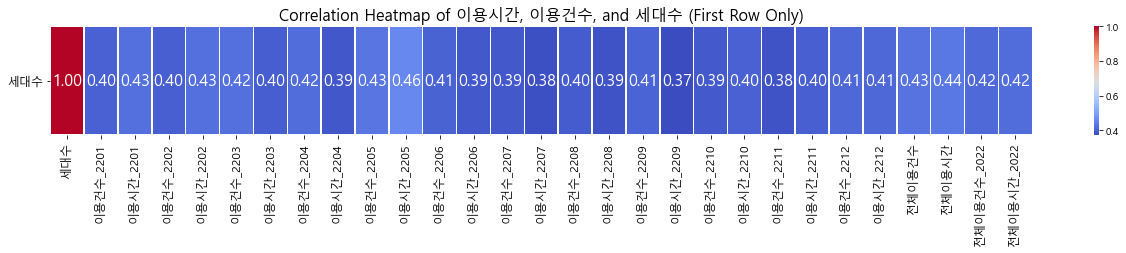

In [12]:
# 상관관계 시각화
세대수_공유차량_columns_2022 = ['세대수'] + [col for col in df_2022.columns if '이용시간' in col or '이용건수' in col]
correlation_세대수_공유차량_2022 = df_2022[세대수_공유차량_columns_2022]
correlation_matrix_세대수_공유차량_2022 = correlation_세대수_공유차량_2022.corr()

plt.figure(figsize=(22, 2))
sns.heatmap(correlation_matrix_세대수_공유차량_2022.iloc[:1, :], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 16})
plt.title('Correlation Heatmap of 이용시간, 이용건수, and 세대수 (First Row Only)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

=> 세대수와 공유차량 이용량의 상관관계가 존재함을 알 수 있음.

### 주차면수와 공유차량 이용량

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


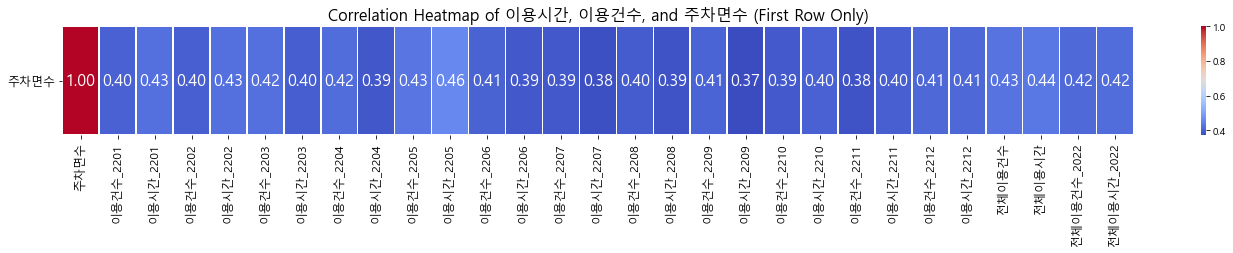

In [13]:
주차면수_공유차량_columns_2022 = ['주차면수'] + [col for col in df_2022.columns if '이용시간' in col or '이용건수' in col]
correlation_주차면수_공유차량_2022 = df_2022[주차면수_공유차량_columns_2022]
correlation_matrix_주차면수_공유차량_2022 = correlation_주차면수_공유차량_2022.corr()

plt.figure(figsize=(24, 2))
sns.heatmap(correlation_matrix_주차면수_공유차량_2022.iloc[:1, :], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 16})
plt.title('Correlation Heatmap of 이용시간, 이용건수, and 주차면수 (First Row Only)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

=> 주차면수도 공유차량 이용량과 상관관계가 존재함.

### 연령층과 공유차량 이용량의 상관관계 확인

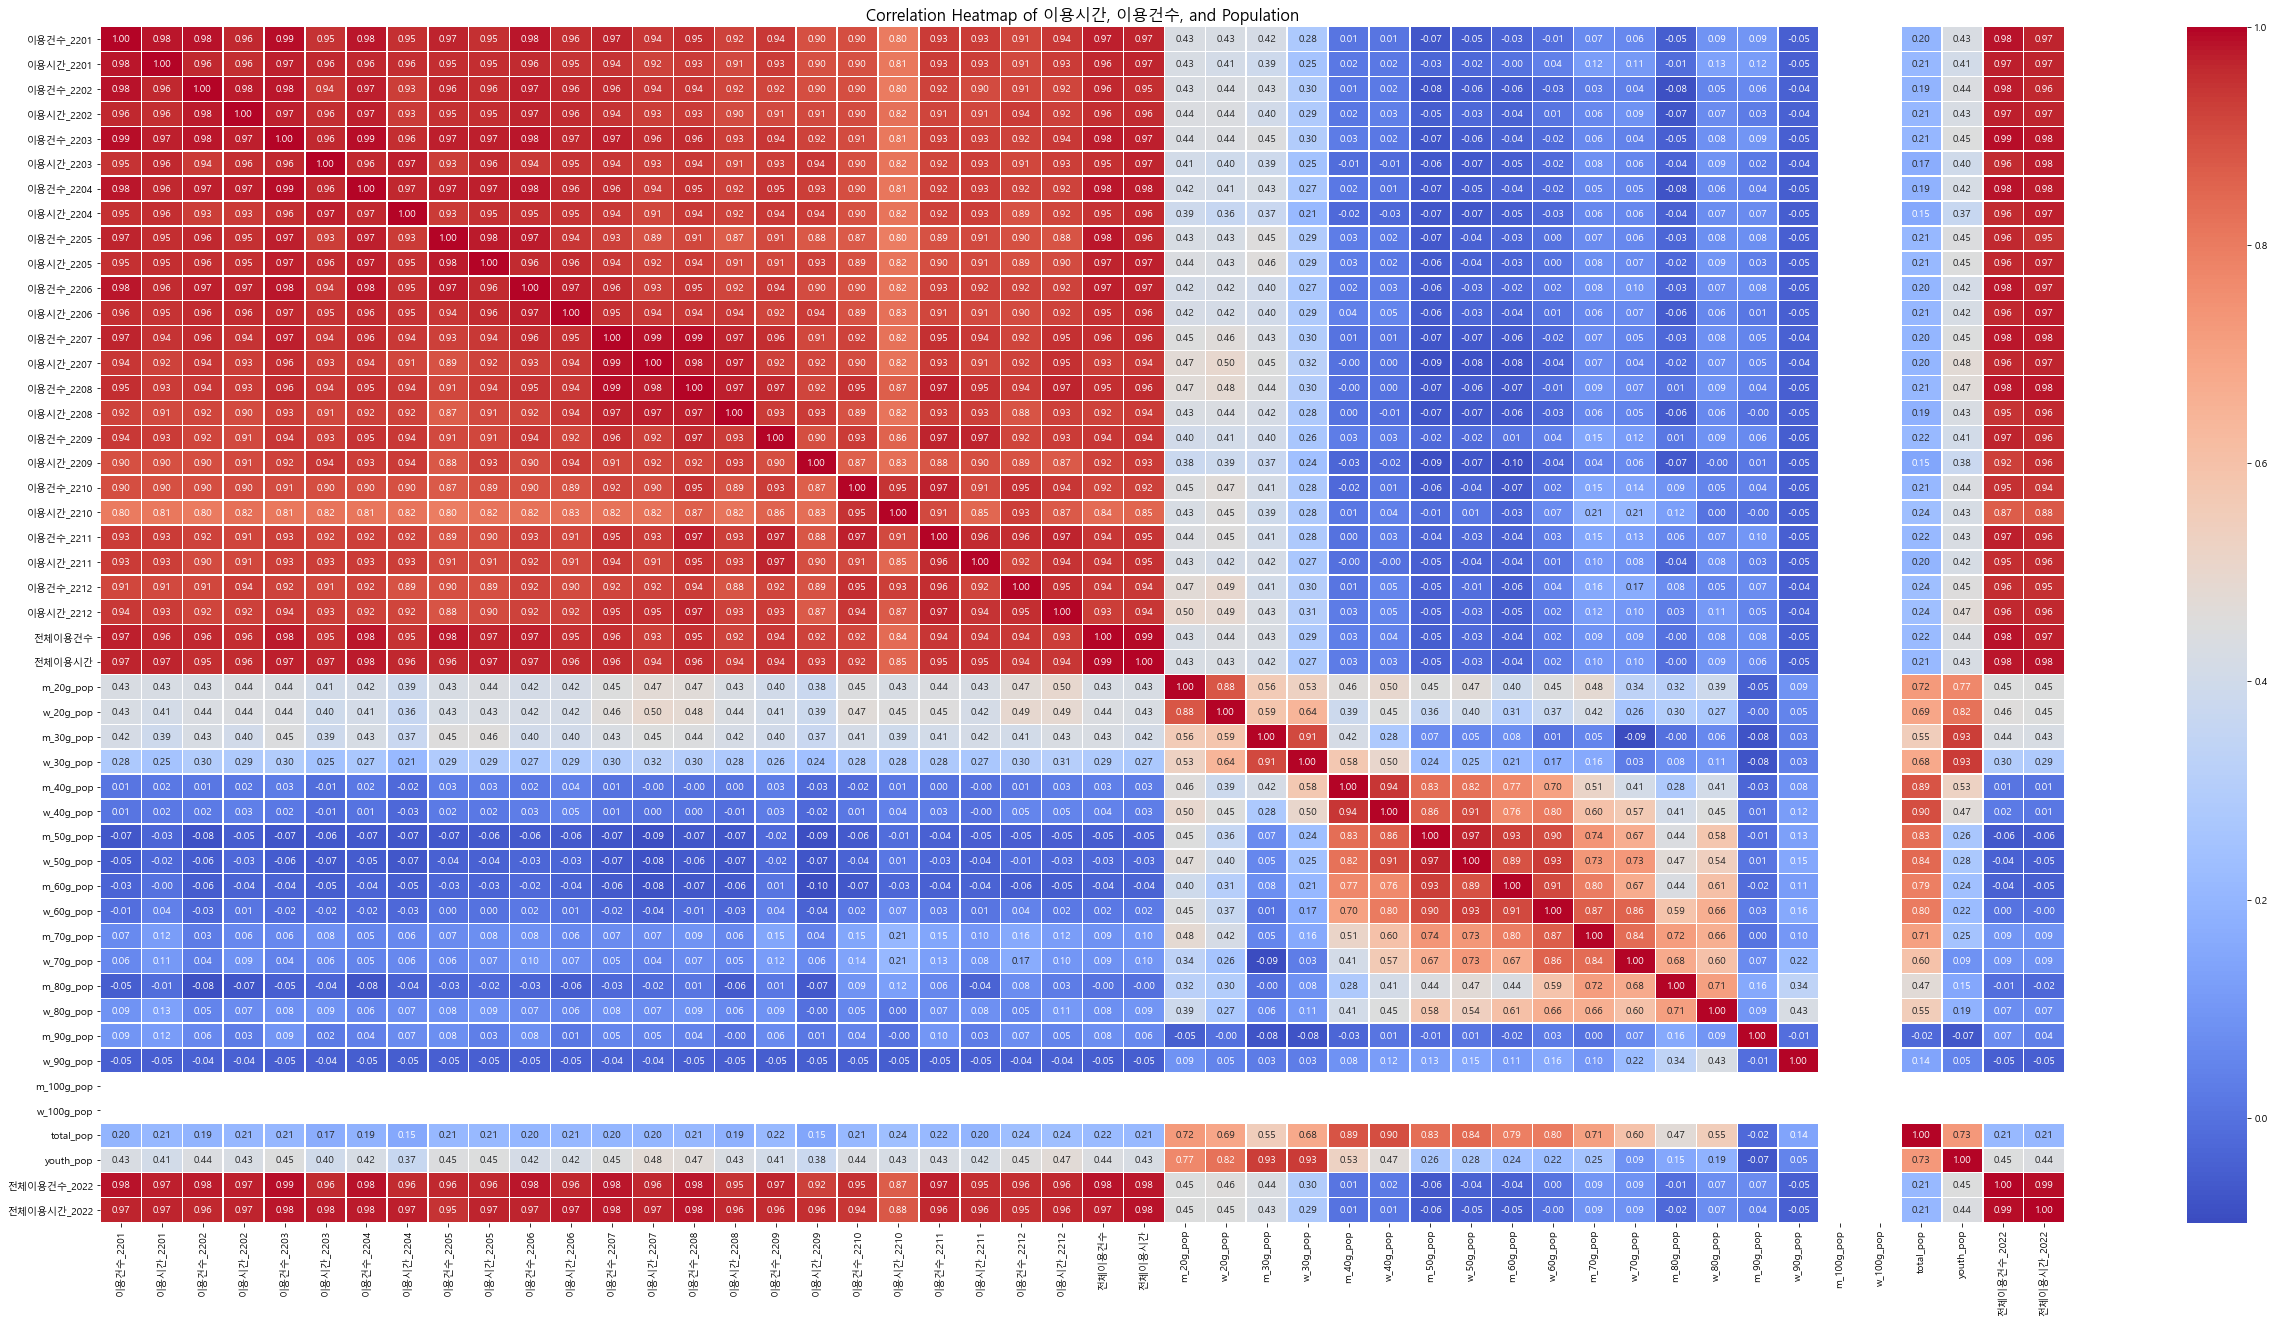

In [14]:
연령층_공유차량_columns_2022 = [col for col in df_2022.columns if 'pop' in col or '이용건수' in col or '이용시간' in col]
correlation_연령층_공유차량_2022 = df_2022[연령층_공유차량_columns_2022]
correlation_matrix_연령층_공유차량_2022 = correlation_연령층_공유차량_2022.corr()

plt.figure(figsize=(44, 22))
sns.heatmap(correlation_matrix_연령층_공유차량_2022, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of 이용시간, 이용건수, and Population', fontsize=16)
plt.show()

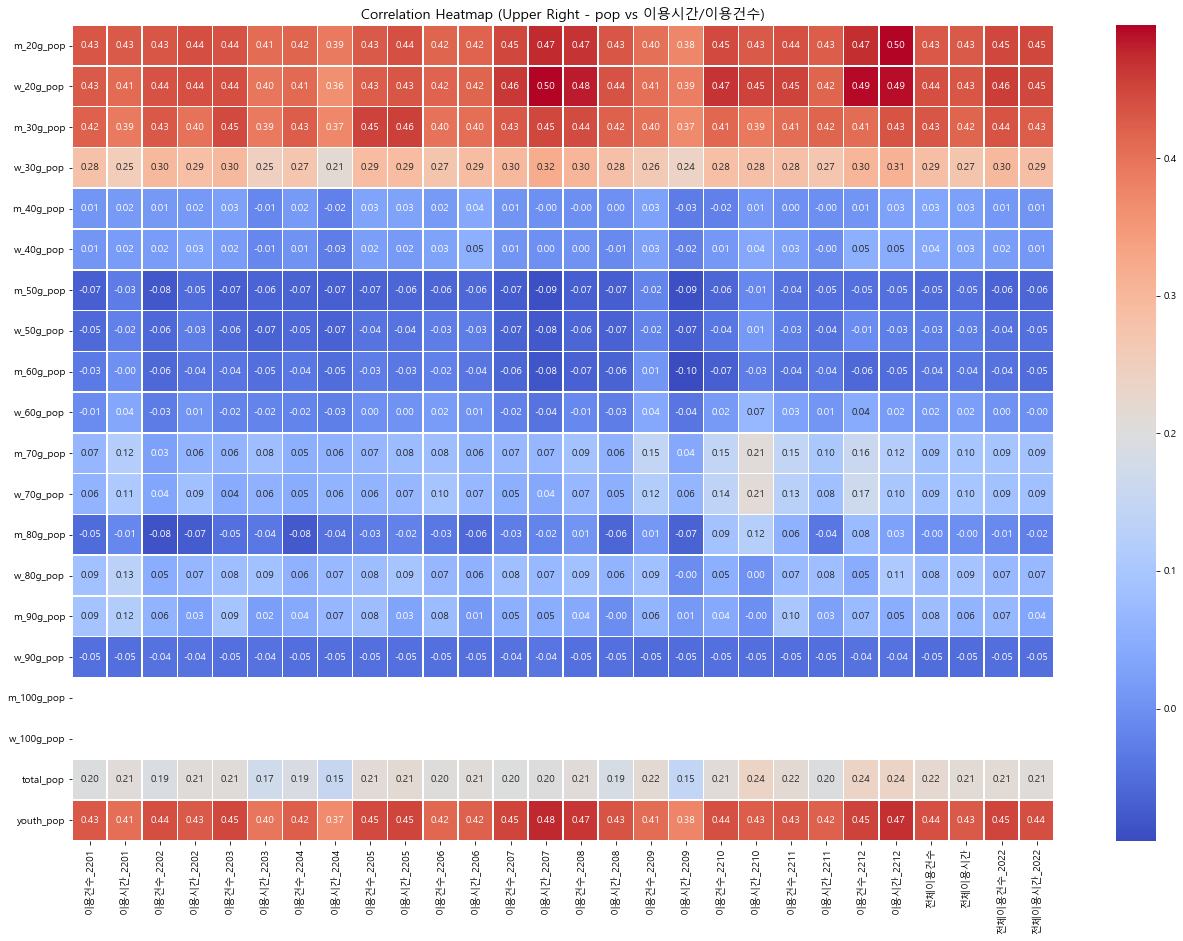

In [15]:
upper_right_matrix_2022 = correlation_matrix_연령층_공유차량_2022.loc[
    [col for col in correlation_matrix_연령층_공유차량_2022.index if 'pop' in col],
    [col for col in correlation_matrix_연령층_공유차량_2022.columns if '이용시간' in col or '이용건수' in col]
]

plt.figure(figsize=(22, 15))
sns.heatmap(upper_right_matrix_2022, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Upper Right - pop vs 이용시간/이용건수)', fontsize=14)
plt.show()

=> 주 소비층이 20~30대 젊은 층이 주 소비층 임을 알 수 있다.  

## 결론
1. 주 이용 고객 연령층: 20~30대
2. 성별이 중요한 것 아닌 것 같음.
3. 행복임대 >> 공공임대 >> 국민임대 == 영구임대 순으로 많이 사용
4. 세대수, 주차면수, 공유차량 이용량은 양의 상관 관계를 띈다.